In [190]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import serial
from matplotlib import cm
import subprocess


In [34]:
subprocess.run("cd ../ ; pio run -t upload", shell=True)

ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14110'
ser.open()

for i in range(20):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    print(f"{i}  : {str_input}")
    if str_input == "Setup done":
        break

ser.close()

********************************************************************************
Obsolete PIO Core v6.1.7 is used (previous was 6.1.9)
Please remove multiple PIO Cores from a system:
https://docs.platformio.org/en/latest/core/installation/troubleshooting.html
********************************************************************************
Processing featheresp32 (platform: espressif32; board: featheresp32; framework: arduino)
--------------------------------------------------------------------------------
Verbose mode can be enabled via `-v, --verbose` option
CONFIGURATION: https://docs.platformio.org/page/boards/espressif32/featheresp32.html
PLATFORM: Espressif 32 (6.3.1) > Adafruit ESP32 Feather
HARDWARE: ESP32 240MHz, 320KB RAM, 4MB Flash
DEBUG: Current (cmsis-dap) External (cmsis-dap, esp-bridge, esp-prog, iot-bus-jtag, jlink, minimodule, olimex-arm-usb-ocd, olimex-arm-usb-ocd-h, olimex-arm-usb-tiny-h, olimex-jtag-tiny, tumpa)
PACKAGES: 
 - framework-arduinoespressif32 @ 3.20009.0 

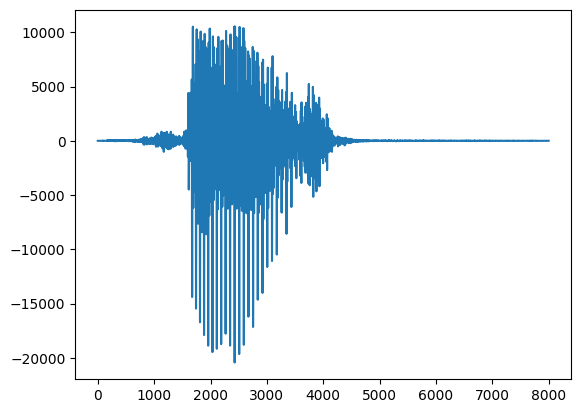

In [35]:
# Dataset path and view possible targets
filename  = '../data_speech_commands_v0.02/four/0a2b400e_nohash_0.wav'  #Four
# filename  = '../data_speech_commands_v0.02/right/0a2b400e_nohash_3.wav' #Right
# filename  = '../data_speech_commands_v0.02/stop/0a196374_nohash_0.wav'  #Stop

signal, fs = librosa.load(filename, sr=8000)
signal=signal*(2**15)
function=signal.astype(np.int16)
np.savetxt('time_series_1s.dat', function, fmt='%d', delimiter='\n')


plt.plot(signal)

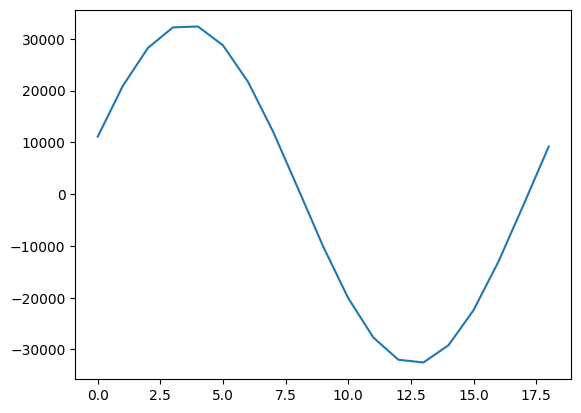

In [371]:
# gerar uma forma de onda que é um seno a 440Hz, de um segundo, amostrado a 8KHz

time=np.linspace(0,1,8000)
function=2**15*np.sin(2*np.pi*440*time)
function=function.astype(np.int16)
np.savetxt('time_series_1s.dat', function, fmt='%d', delimiter='\n')


plt.plot(np.array(function[1:20]))

In [37]:
a= function
a= a.astype(np.int16)
# a= a.astype(np.int32)


ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14110'
ser.open()

for i in range(len(a)):
    values = str(a[i])
    send=bytearray(values, encoding='utf8')
    jumpline=bytearray('\n', encoding='utf8')
    ser.write(send)
    ser.write(jumpline)
    # print(f"send   [{i}]  : {send}")
    
data = []                       # empty list to store the data
for i in range(256):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    data.append(str_input)
    print(f"{i}  : {str_input}")
    
    
mfcc=np.array(data)
# mfcc=mfcc.astype(np.int16)
mfcc=mfcc.astype(np.float16)

    


ser.close()
print(len(mfcc))

0  : 
1  : abort() was called at PC 0x400e3417 on core 1
2  : 
3  : 
4  : Backtrace: 0x400833dd:0x3ffb1860 0x40087f81:0x3ffb1880 0x4008d1f9:0x3ffb18a0 0x400e3417:0x3ffb1920 0x400e345e:0x3ffb1940 0x400e33bf:0x3ffb1960 0x400e37de:0x3ffb1980 0x400d1854:0x3ffb19a0 0x400d2bda:0x3ffb19c0 0x400d2c61:0x3ffb19f0 0x400d3387:0x3ffb1a40 0x400d500d:0x3ffb2290
5  : 
6  : 
7  : 
8  : 
9  : ELF file SHA256: 02c20225e9d4eaa8
10  : 
11  : Rebooting...
12  : 
13  : 
14  : Starting setup...
15  : Freq Sample : 8000
16  : Num Cepstra : 15
17  : Num Filters : 16
18  : FFT   Size  : 1024
19  : Frame Shift : 465
20  : Init Filterbank
21  : Init Twiddle
22  : MFCC_INIT done
23  : Free Heap: 85324
24  : Setup done


KeyboardInterrupt: 

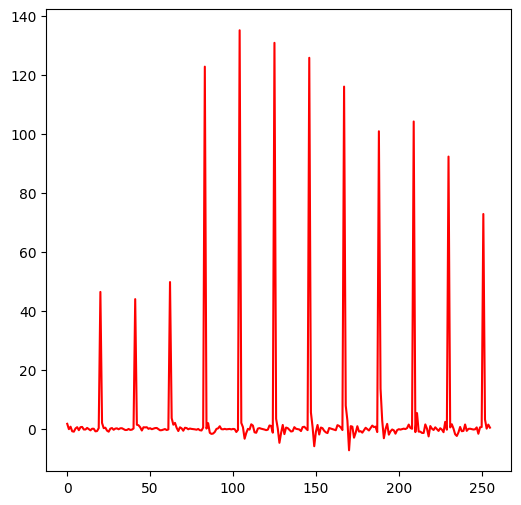

In [231]:
%matplotlib inline


plt.figure(figsize=(6,6))
plt.plot(mfcc,'r')
plt.show()


(16, 16)


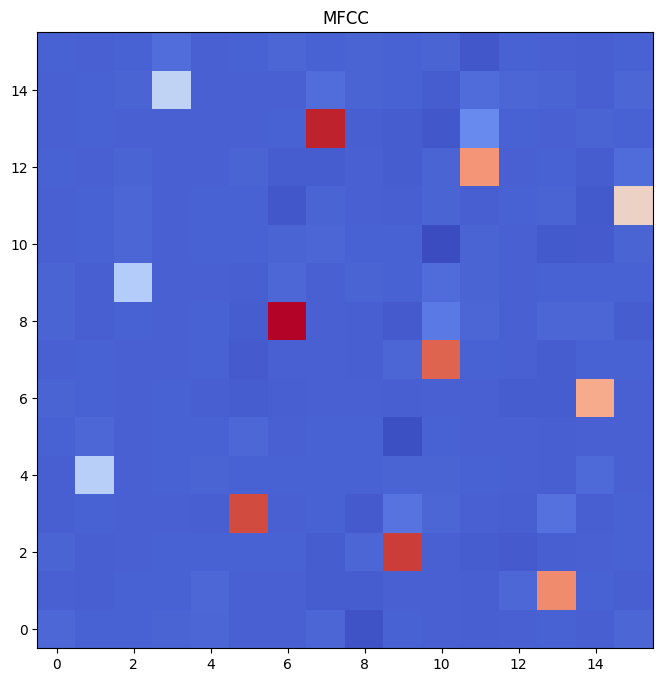

In [232]:
mfcc_from_time_series = mfcc.reshape(16,16)

print(mfcc_from_time_series.shape)

#plt.figure(figsize=(12,12))

fig, ax = plt.subplots(figsize=(8,8))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()

In [30]:
#Change -DFFTXXXX to the desired FFT size
subprocess.run('g++ -Dcomputer compute_mfcc.cpp -o compute_mfcc' , shell=True)  
subprocess.run(["./compute_mfcc"], shell=True)

Freq Sample : 8000
Num Filters : 16
FFT   Size  : 1024
Frame Shift : 465


CompletedProcess(args=['./compute_mfcc'], returncode=0)

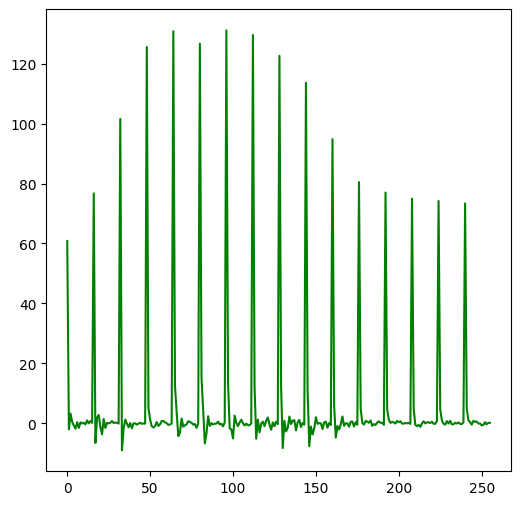

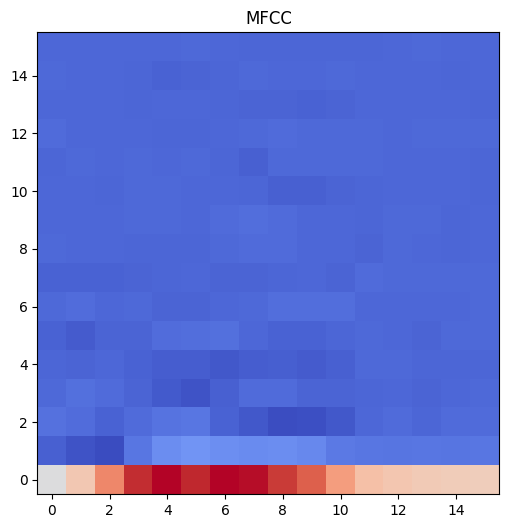

In [31]:

mfcc_from_time_series = np.genfromtxt('mfcc_from_time_series_1s.dat',delimiter='\n',dtype=None)

%matplotlib inline


plt.figure(figsize=(6,6))
# #plt.plot(mfcc_output,'r')

plt.plot(mfcc_from_time_series,'g')
# plt.plot(mfcc,'r')

mfcc_from_time_series = mfcc_from_time_series.reshape(16,16)
fig, ax = plt.subplots(figsize=(6,6))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()